# Workbook 11
This week will be covering regression diagnostics and final paper workshop #11. The regression diagnostics uses UCLA Stata help page: https://stats.oarc.ucla.edu/stata/webbooks/reg/chapter2/stata-webbooksregressionwith-statachapter-2-regression-diagnostics/

### Regression Diagnostics
There are a couple assumptions in regression analyses:
*Independent and identically distributed (iid)
*Homoscedactivity (equal variance)

We will discuss ways to evaluate data and regresison model.

In [21]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week11"

C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week11


In [4]:
*opening crime dataset
use "https://stats.idre.ucla.edu/stat/stata/webbooks/reg/crime", clear

desc

summ


(crime data from agresti & finlay - 1997)


Contains data from https://stats.idre.ucla.edu/stat/stata/webbooks/reg/crime.dta
 Observations:            51                  crime data from agresti & finlay
                                                - 1997
    Variables:             9                  24 Feb 2001 14:23
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
sid             float   %9.0g                 
state           str3    %9s                   
crime           int     %8.0g                 violent crime rate
murder          float   %9.0g                 murder rate
pctmetro        float   %9.0g                 pct metropolitan
pctwhite        float   %9.0g                 pct white
pcths           float   %9.0g                 pct hs graduates
poverty      

We are interested to make a model that explains the violent crime rate. The unit of analysis is states. Notice that the "violent crime rate" and "murder rate" are non-percentage scale. Metro, white reidents, educational attainment, poverty, and single parents are all percentages.

We will estimate an OSL model with crime rate as the dependent variable and the following independent variables: metro, potvery, and single.

In [5]:
regress crime pctmetro poverty single


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(3, 47)        =     82.16
       Model |  8170480.21         3   2723493.4   Prob > F        =    0.0000
    Residual |  1557994.53        47  33148.8199   R-squared       =    0.8399
-------------+----------------------------------   Adj R-squared   =    0.8296
       Total |  9728474.75        50  194569.495   Root MSE        =    182.07

------------------------------------------------------------------------------
       crime | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    pctmetro |   7.828935   1.254699     6.24   0.000     5.304806    10.35306
     poverty |   17.68024    6.94093     2.55   0.014     3.716893     31.6436
      single |   132.4081   15.50322     8.54   0.000     101.2196    163.5965
       _cons |  -1666.436    147.852   -11.27   0.

#### Residuals
Residuals the difference between the predicted values and actual values. Residuals are powerful bits of information because they tell us information on how well the model fits the data. A residual equal to zero means no difference. Positive residuals are above the regression model. Negative residuals are below the regression model.

There are two common types of residuals:
*residuals is the unstandardized difference
*studentized residuals is the standardized residuals (it divides the residuals by the standard deviation)

In [6]:
*Stata can calculate residuals
*this calculates unstandardized residuals
predict r_unst, residuals 

*this calculates the standardized residuals
predict r_std, rstudent

#### When checking the residuals, we want to observe for strange data like outliers or weird patterning. We can look at it by scatter plots of stem-and-leaf plot.

Generally, when looking at studentized residuals, POSSIBLE outliers are those observations with studentized reisduals greater than 3 or below -3.

$ \lvert r_{studentized} \rvert \ge 2 $

the 2 is for TWO standard deviations b/c of normal distribution

In [7]:
*this makes a stem and leaf plot
stem r_unst
stem r_std



Stem-and-leaf plot for r_unst (Residuals)

r_unst rounded to integers

 -5** | 23
 -4** | 
 -4** | 
 -3** | 
 -3** | 
 -2** | 98,92
 -2** | 31,05,03
 -1** | 84,83,56,53
 -1** | 14,04,01
 -0** | 98,90,84,83,80,65,64,54,51
 -0** | 37,14,04
  0** | 09,10,15,23,46,47
  0** | 51,55,62,73,86,88
  1** | 02,13,24,39,48
  1** | 78,83,84,93
  2** | 06,24
  2** | 76
  3** | 
  3** | 
  4** | 13,26


Stem-and-leaf plot for r_std (Studentized residuals)

r_std rounded to nearest multiple of .01
plot in units of .01

 -3** | 57
 -3** | 
 -2** | 
 -2** | 
 -1** | 84,69
 -1** | 30,15,13,04,02
 -0** | 87,85,65,58,56,55,54
 -0** | 47,46,45,38,36,30,28,21,08,02
  0** | 05,06,08,13,27,28,29,31,35,41,48,49
  0** | 56,64,70,80,82
  1** | 01,03,03,08,15,29
  1** | 59
  2** | 
  2** | 62
  3** | 
  3** | 77


<i>Note that the stem and leaf plots are similar for both residuals but the studentized residuals is more easy to identify because it is standarized.</i>
    
So we see 57, 62, and 77 are possible outliers but we need to figure out which states.

In [17]:
list state r_std crime pctmetro poverty single if abs(r_std) > 2


     +---------------------------------------------------------+
     | state       r_std   crime   pctmetro   poverty   single |
     |---------------------------------------------------------|
  9. |    fl    2.619523    1206         93      17.8     10.6 |
 25. |    ms   -3.570789     434       30.7      24.7     14.7 |
 51. |    dc    3.765847    2922        100      26.4     22.1 |
     +---------------------------------------------------------+


### Leverage
Remember the iid assumption, specifically the "identically distributed." One way to evaluate id assumption is to use LEVERAGE. Statistical leverage is the difference between independent variables and the mean. 

Generally, observations should follow:

$ lev < \frac{2k+2}{n} $

If leverage is greater, it is possible outlier.

In [13]:
*Stata calculate leverage
predict lev, leverage
*again we can use a stem and leaf plot
stem lev


Stem-and-leaf plot for lev (Leverage)

lev rounded to nearest multiple of .001
plot in units of .001

  0** | 20,24,24,28,29,29,31,31,32,32,34,35,37,38,39,43,45,45,46,47,49
  0** | 50,57,60,61,62,63,63,64,64,67,72,72,73,76,76,82,83,85,85,85,91,95
  1** | 00,02,36
  1** | 65,80,91
  2** | 
  2** | 61
  3** | 
  3** | 
  4** | 
  4** | 
  5** | 36


In [14]:
display (2*3+2)/51

.15686275


In [15]:
list crime pctmetro poverty single state lev if lev >.156


     +--------------------------------------------------------+
     | crime   pctmetro   poverty   single   state        lev |
     |--------------------------------------------------------|
  1. |   761       41.8       9.1     14.3      ak   .2606759 |
 18. |  1062         75      26.4     14.9      la   .1652769 |
 25. |   434       30.7      24.7     14.7      ms    .191012 |
 49. |   208       41.8      22.2      9.4      wv   .1802005 |
 51. |  2922        100      26.4     22.1      dc    .536383 |
     +--------------------------------------------------------+


### Cook's D
This is another measure of influence. Generally, observations with:

$ D_{Cooks} > \frac{4}{n} $

should be observed

In [16]:
*Stata calculates Cook's D
predict d, cooksd
list crime pctmetro poverty single state d if d>4/51




     +--------------------------------------------------------+
     | crime   pctmetro   poverty   single   state          d |
     |--------------------------------------------------------|
  9. |  1206         93      17.8     10.6      fl    .173629 |
 18. |  1062         75      26.4     14.9      la   .1592638 |
 25. |   434       30.7      24.7     14.7      ms    .602106 |
 51. |  2922        100      26.4     22.1      dc   3.203429 |
     +--------------------------------------------------------+


## Added-variable plots
Added-variable plots are a way to visualize each independent variable and residuals. These are also know as partial-regression leveage plots.

In [22]:
avplots , mlabel(state)
graph export "avplots_crime.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph2.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph2.pdf saved as PDF format

(file avplots_crime.png not found)
file avplots_crime.png saved as PNG format


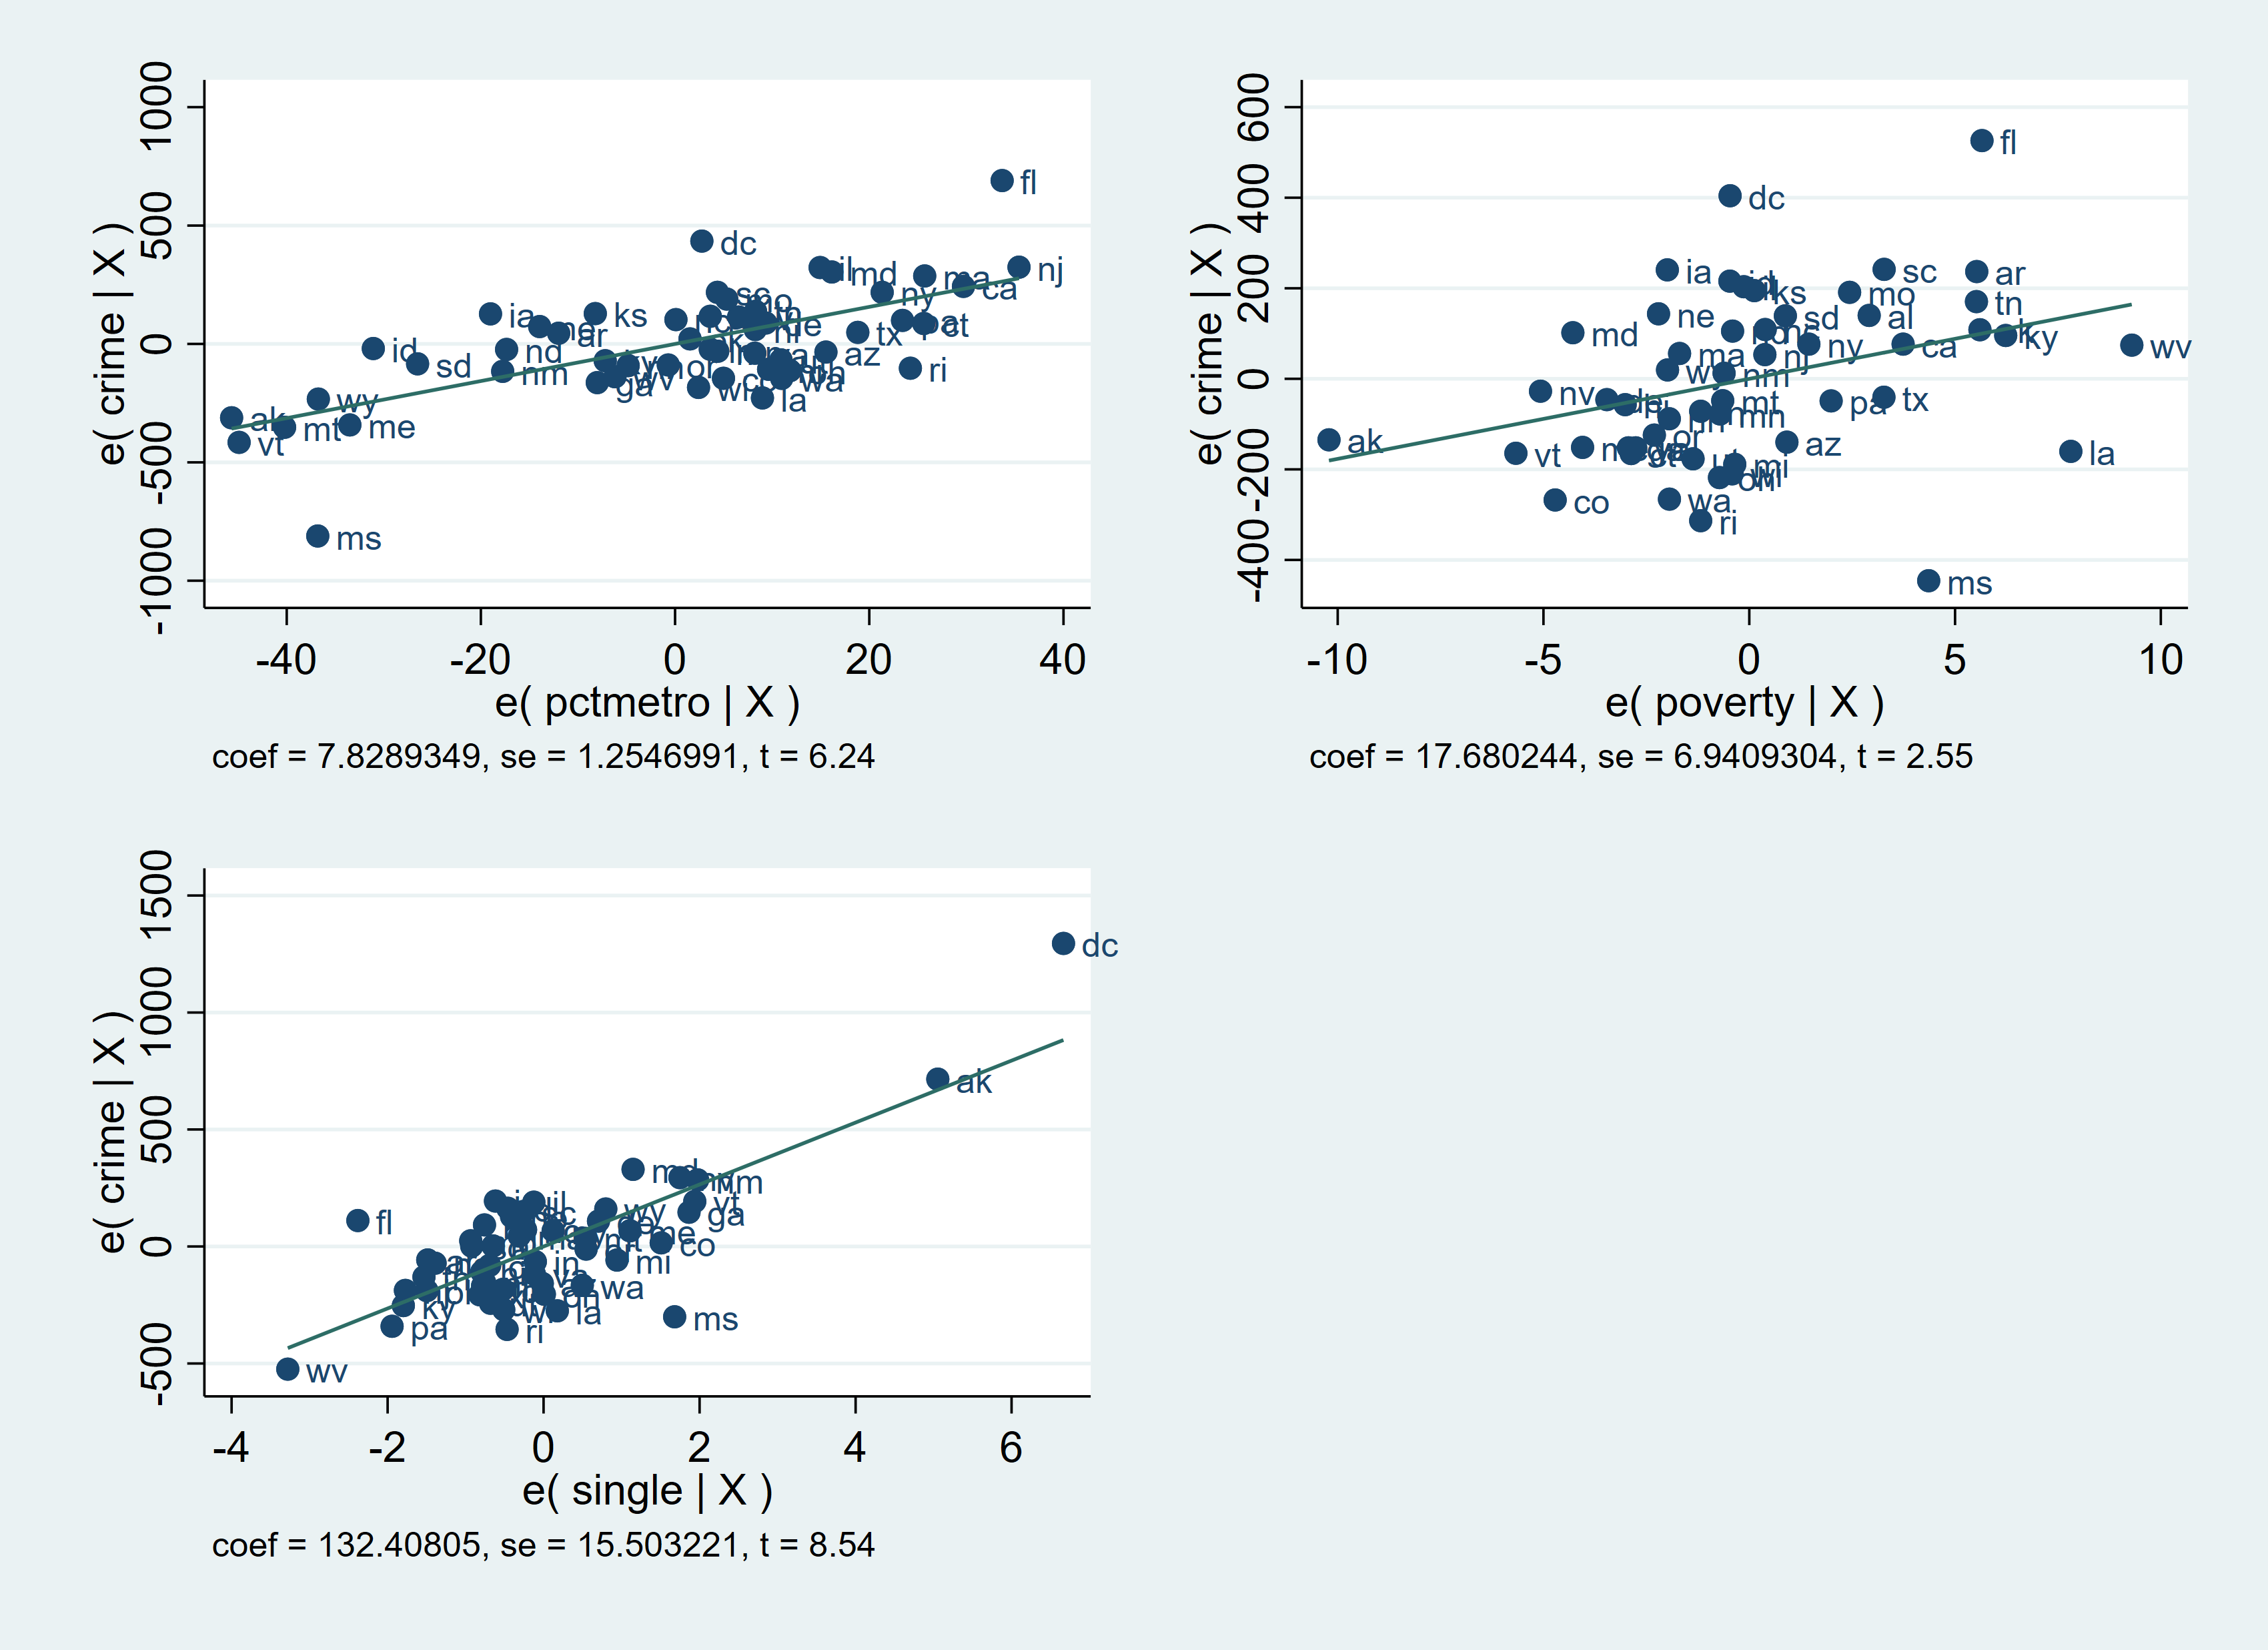

In [23]:
regress crime pctmetro poverty single

regress crime pctmetro poverty single if state!="dc"



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(3, 47)        =     82.16
       Model |  8170480.21         3   2723493.4   Prob > F        =    0.0000
    Residual |  1557994.53        47  33148.8199   R-squared       =    0.8399
-------------+----------------------------------   Adj R-squared   =    0.8296
       Total |  9728474.75        50  194569.495   Root MSE        =    182.07

------------------------------------------------------------------------------
       crime | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    pctmetro |   7.828935   1.254699     6.24   0.000     5.304806    10.35306
     poverty |   17.68024    6.94093     2.55   0.014     3.716893     31.6436
      single |   132.4081   15.50322     8.54   0.000     101.2196    163.5965
       _cons |  -1666.436    147.852   -11.27   0

Here, I *might* present both results to show that the significance and direction of the beta coefficient (independent variables) is the same with or without DC.

Another option is to argue to DROP DC because it is isn't a state.

### Are residuals normally distributed?
We can use kernal density plot to assess normal distribution.

In [27]:
*this plot kernal density
kdensity r_unst, normal
graph export "kdensity_crime.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph5.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph5.pdf saved as PDF format

file kdensity_crime.png saved as PNG format


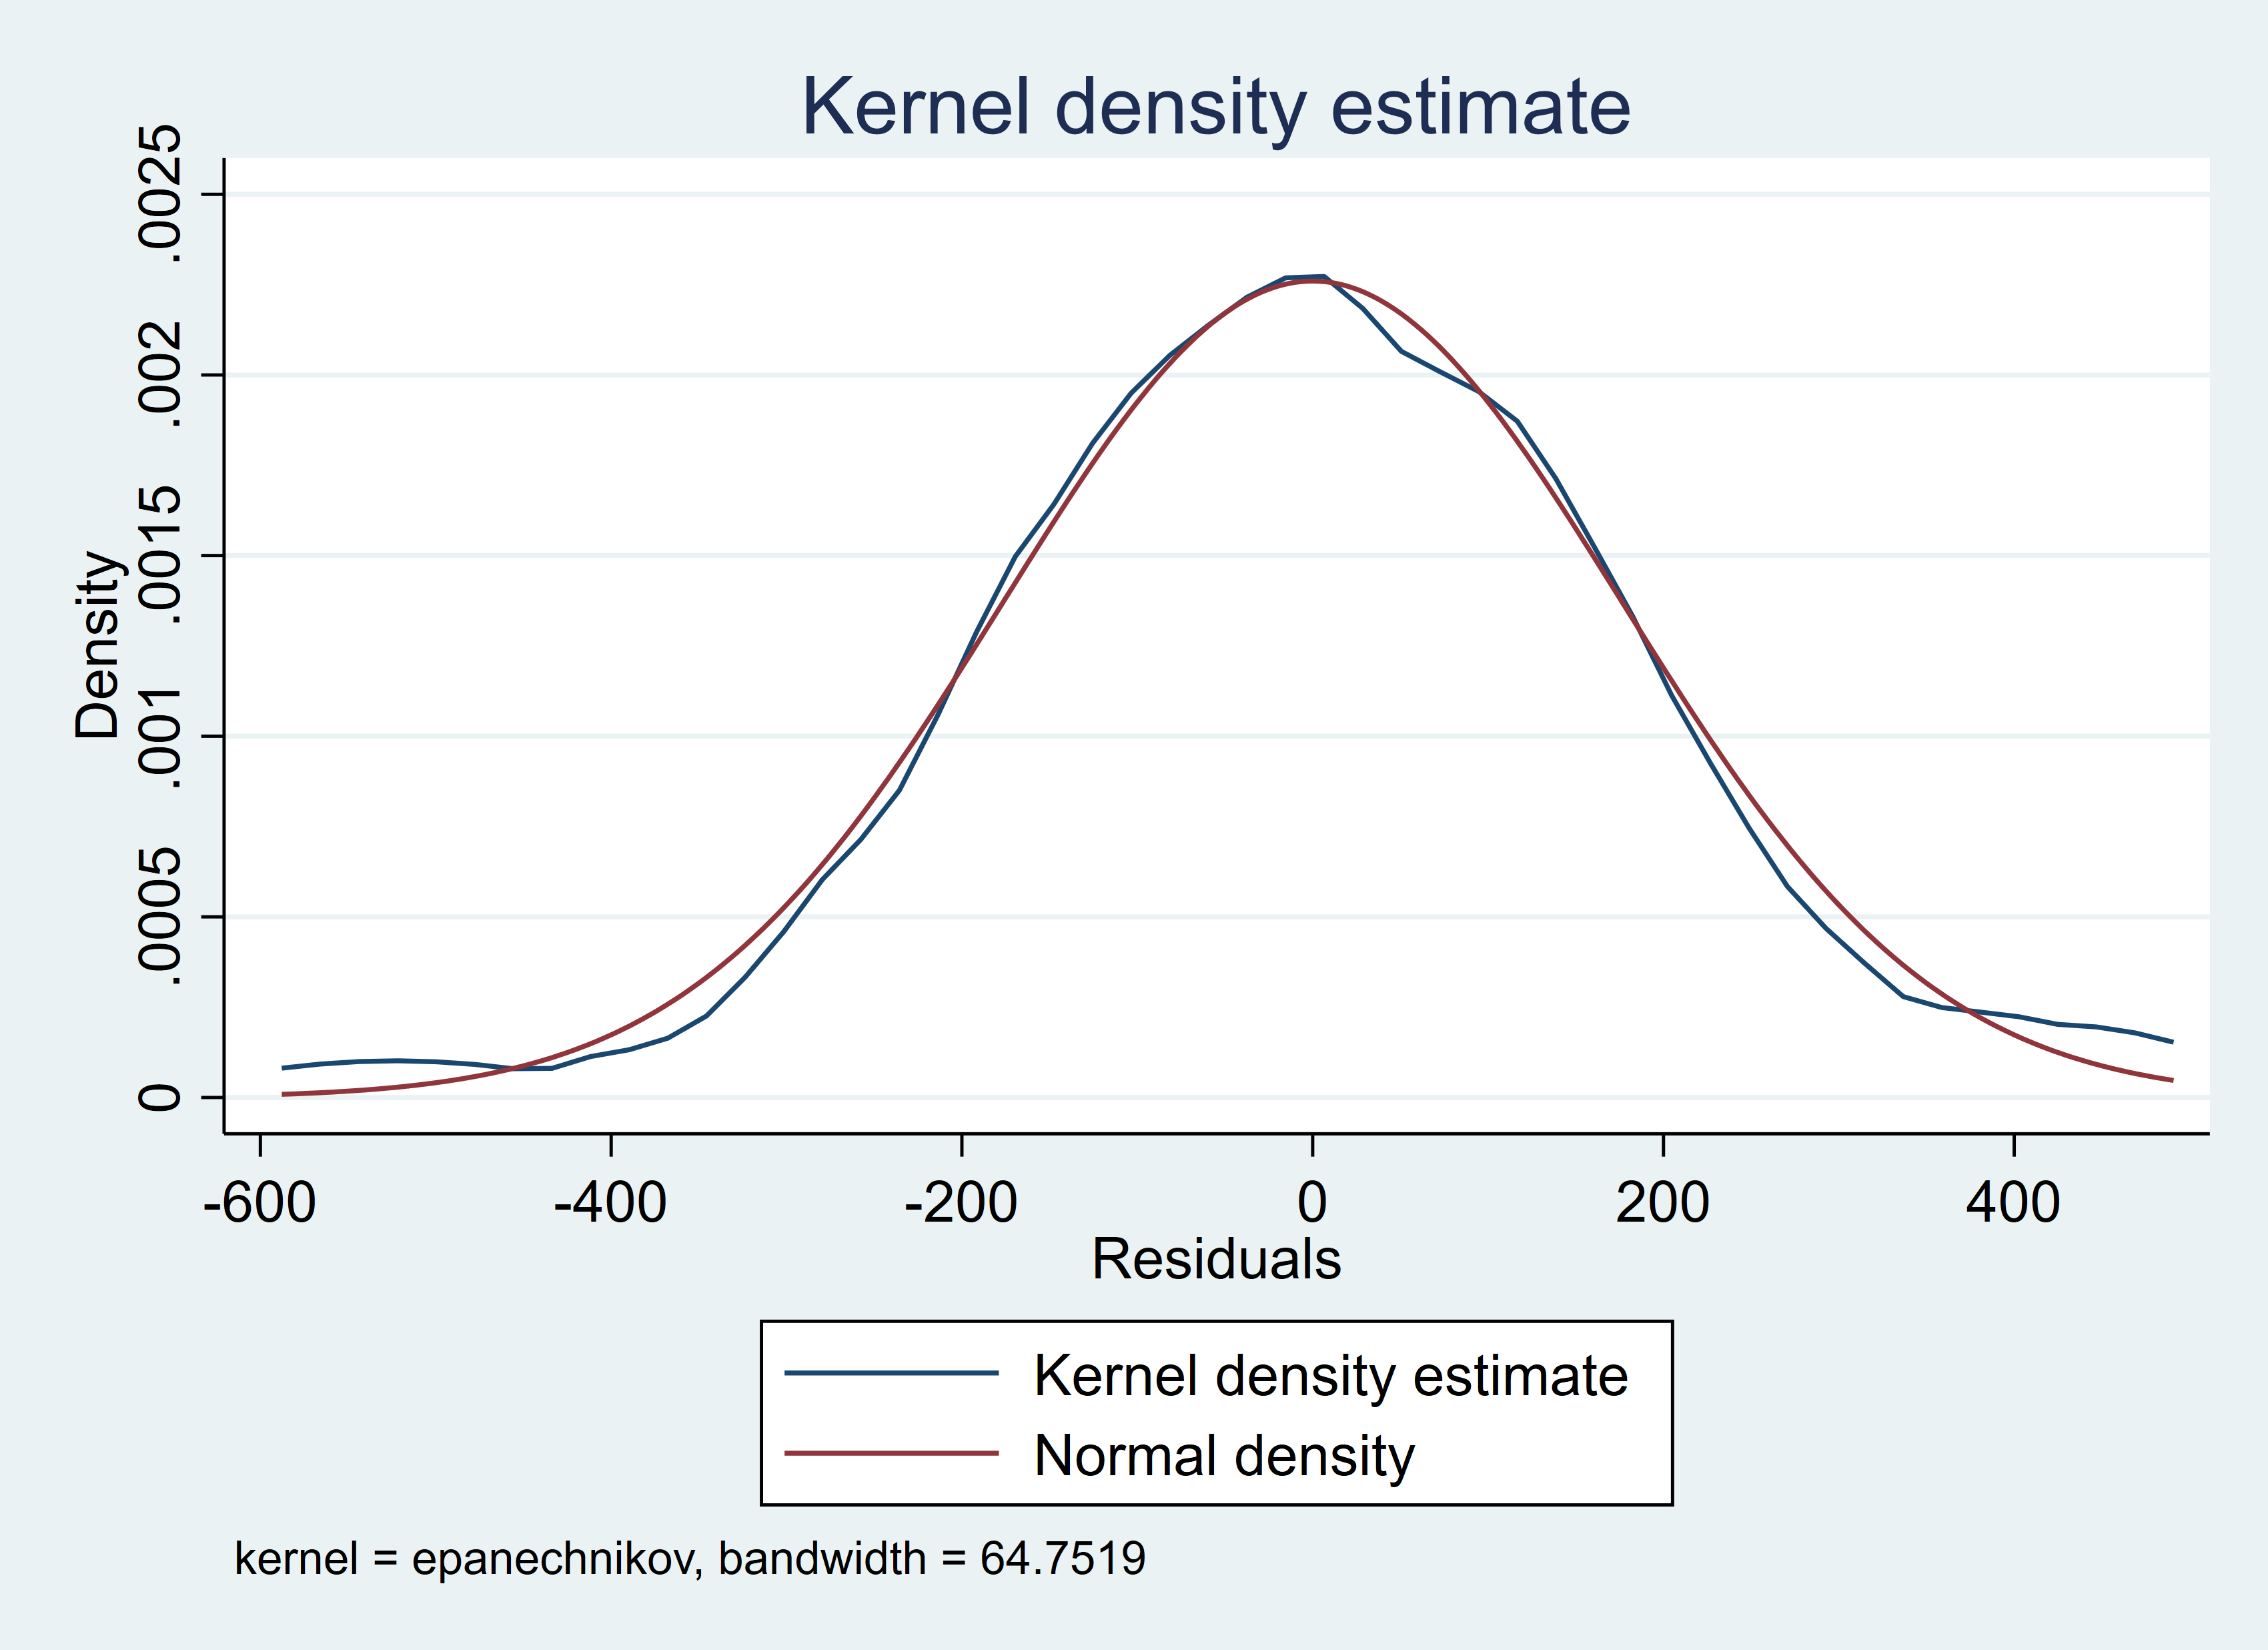

### Homoscedasticity
One assumption of regression is the constant/equal variance of the residuals this is also known as homoscedasticity. When the variance of the residuals is not constant, this is known as heteroscedasticity.

In [28]:
*this makes a residuals plot
rvfplot, yline(0)
graph export "chck_heterscek_crime.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph6.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph6.pdf saved as PDF format

(file chck_heterscek_crime.png not found)
file chck_heterscek_crime.png saved as PNG format


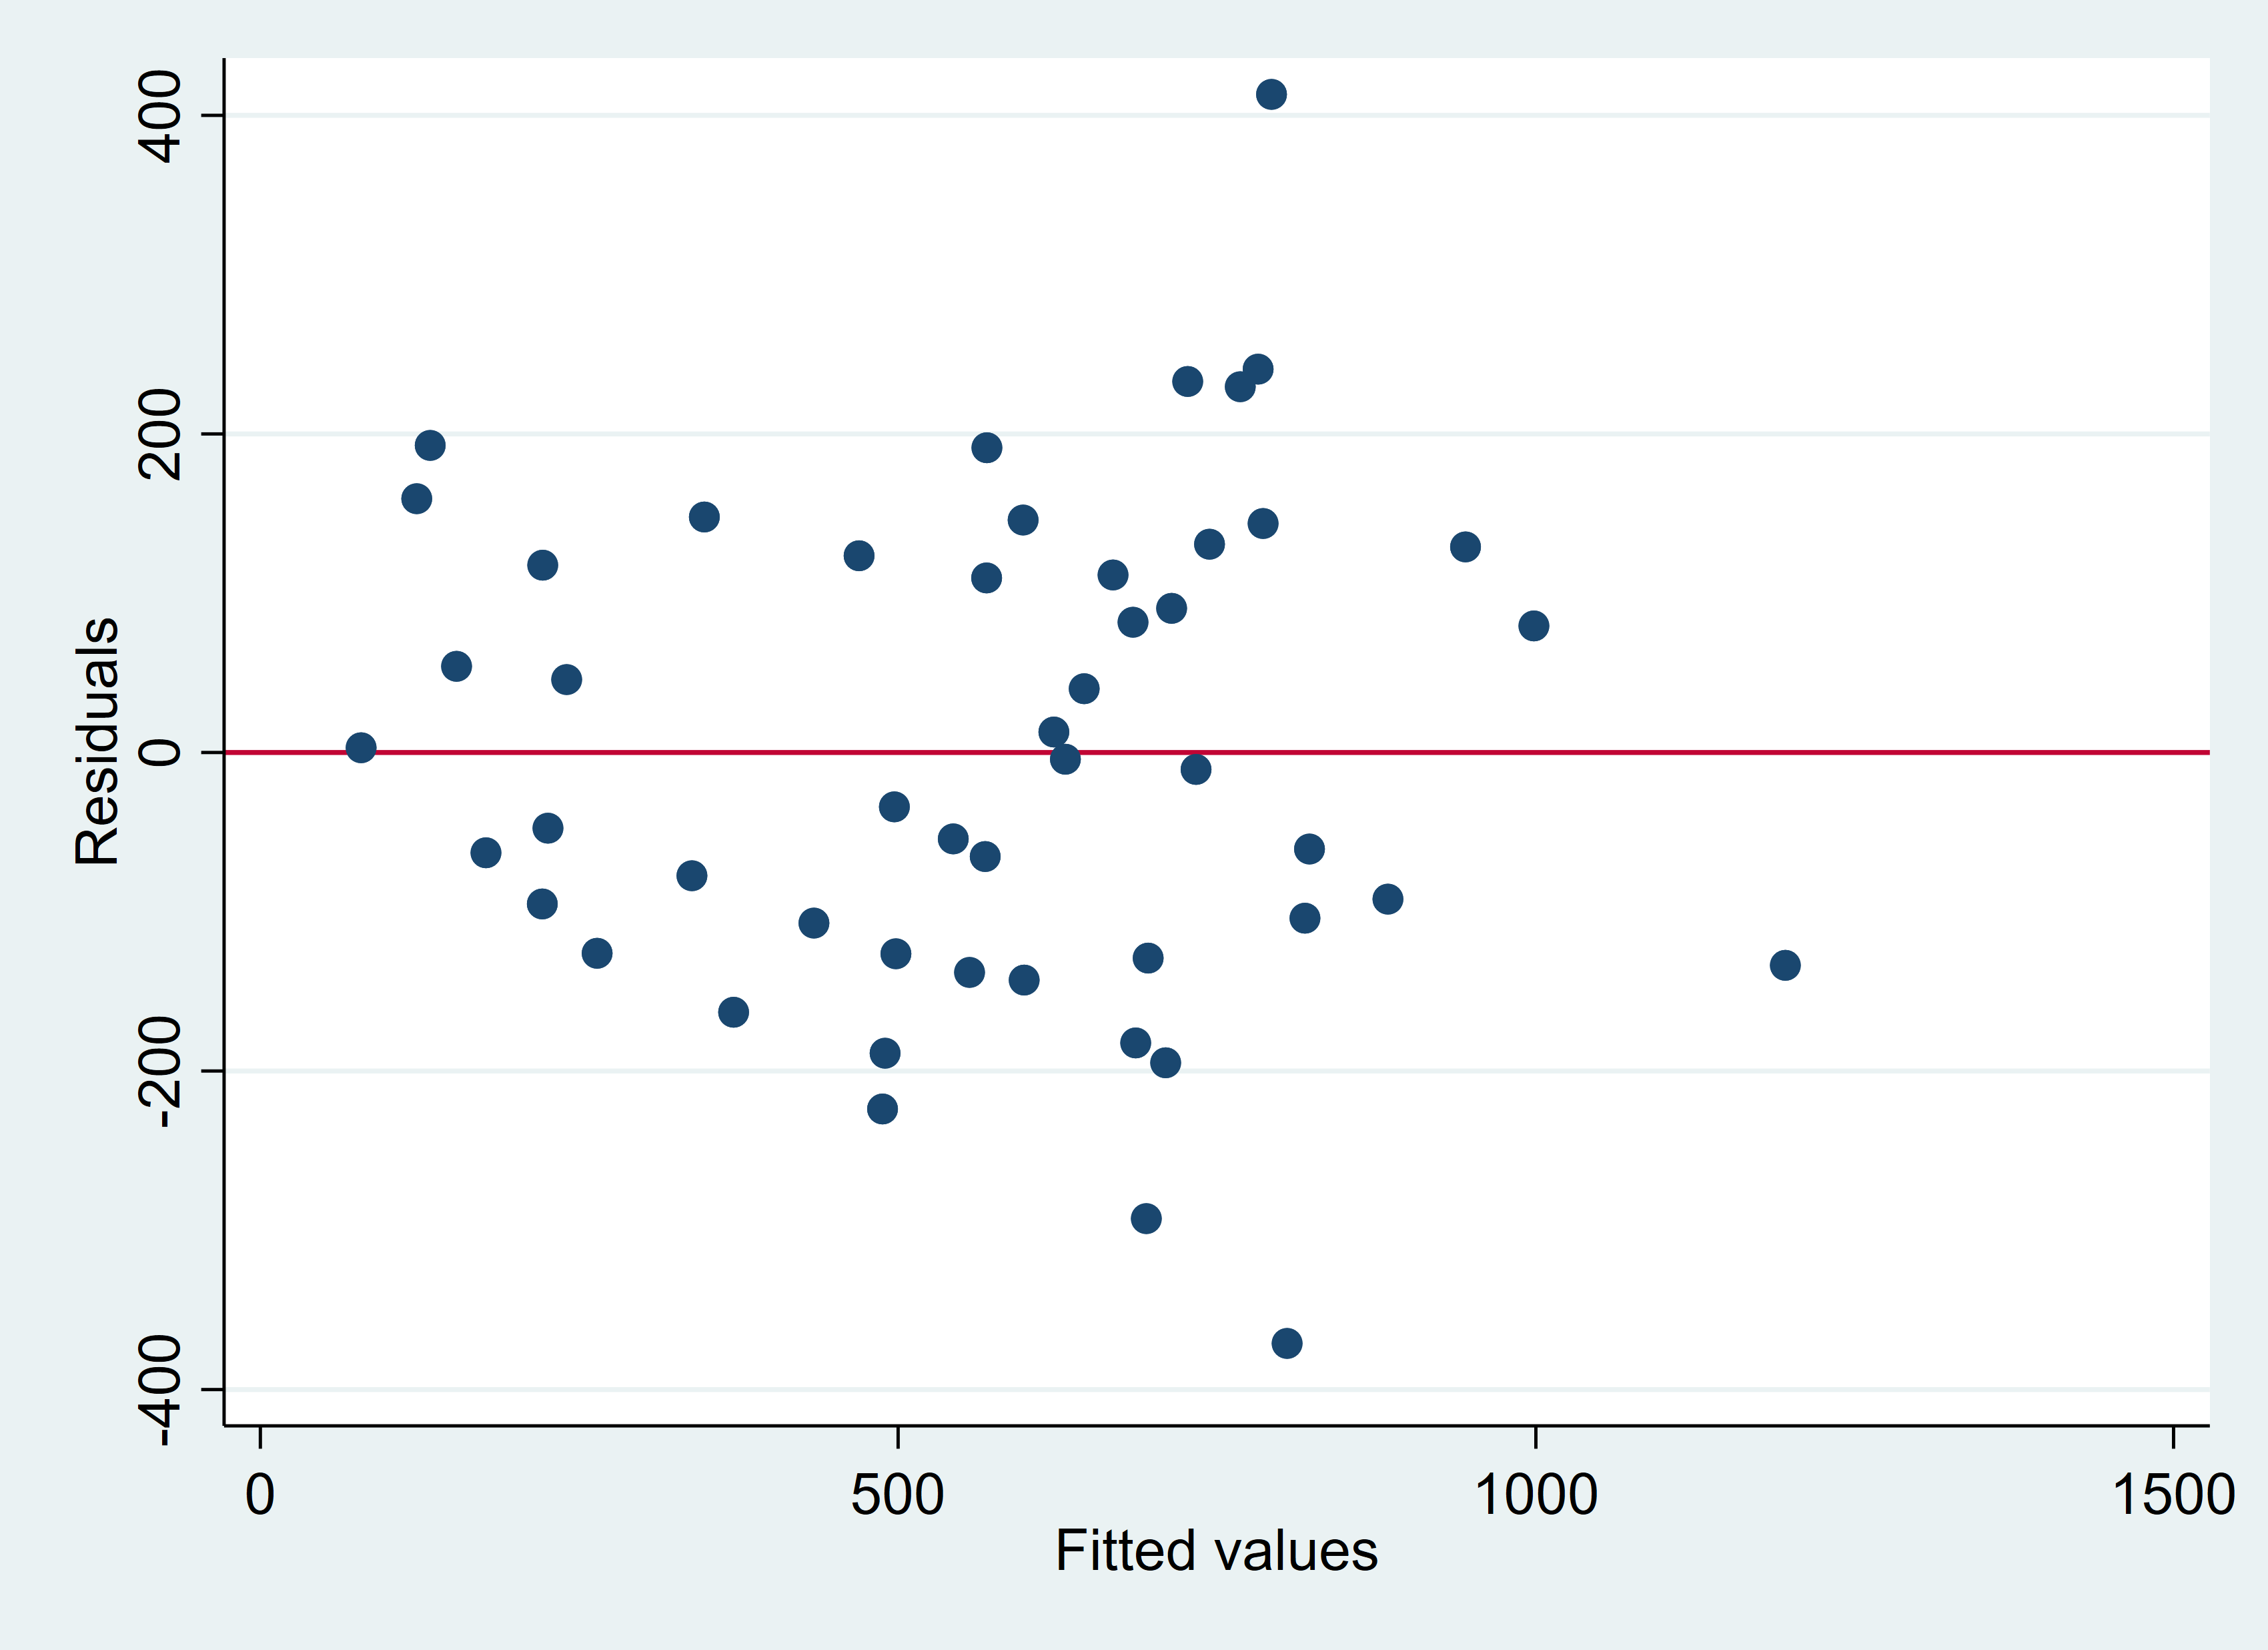

Mostly of the dots should between within the same boundaries such as between -300 to 300.

There are other equation-ways to measure heteroskedasticity

In [29]:
*These are two ways to measure heteroskedasticity
estat imtest

estat hettest



Cameron & Trivedi's decomposition of IM-test

--------------------------------------------------
              Source |       chi2     df         p
---------------------+----------------------------
  Heteroskedasticity |      13.50      9    0.1414
            Skewness |       8.78      3    0.0323
            Kurtosis |       0.16      1    0.6876
---------------------+----------------------------
               Total |      22.44     13    0.0489
--------------------------------------------------


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of crime

H0: Constant variance

    chi2(1) =   2.74
Prob > chi2 = 0.0981


Here, the White's test (in the imtest command) of heteroskedasticity shows no hetersckedasticity. However, the Breusch-Pagan test of heteroskedasticity reports hetersckedascity.

### Multicollinearity
Multicollinearity is when mutiple independent variables correlate. It is possible that multicollinearity to over-explain or inflate the results. One way to check for multicollinearity is to measure the variance inflation factor (VIF) for each variable. 

Generally,

$ VIF < 10 $

is acceptance

In [30]:
*Stata calculates the VIF for each independent variable.
vif


    Variable |       VIF       1/VIF  
-------------+----------------------
      single |      1.31    0.763200
     poverty |      1.31    0.763657
    pctmetro |      1.09    0.913953
-------------+----------------------
    Mean VIF |      1.24


# Workshop #1

<b>Identify data sets. Write 3-5 sentences describing the data set. You can discuss who (or what institute) hosts or produces the data. What kind of information the data includes? Describe the year(s) the data was collect. Etc…</b>

The data for my research project comes from a variety of sources including web scaping techniques, the EPA, and secondary Census data. I use data from the Government Accountability Office (GAO), Wikipedia (specifically Geohack), the Environmental Protection Agency (EPA), and the Geolytics Neighborhood Change Database (NCDB). The unit of analysis is census tracts and is for the years 1970-2010. 

<b>Submit a research question. Research questions are usually more general and open-ended as compared to hypotheses. Examples of research questions are: Is there intracategorical intersectional patterning among Latinx communities for air pollution? Does neighborhood demographics relate to access to environmental clean-up programs?</b>

My research question: Is there an environmental cleanup disparity for the NPL/superfund program for major closure BRAC sites? I evaluate the environmental cleanup disparity with neighborhood demographics.

<b>Identify at least ONE dependent variable and THREE independent variables. You must at least have one categorical and numeric independent variables.</b>

Dependent variable: Is the closed military base nearby part of the Superfund program? (Yes/no)
Indepedent variables: % of white residents, % of resident of color, median household income, metropolitian status, and % of renters.

<b>Submit at least two hypotheses. The hypotheses should be specific about the variables and direction of the variables. </b>

<i>Null hypothesis</i>

H0: There is no difference in neighborhood demographics among BRAC sites in the superfund program and those not in the superfund program.

<i>Environmental cleanup disparity hypothesis</i>

H1: BRAC sites within white neighborhoods and higher-income communities are more likely to be chosen for the superfund program.

<b>Identify mechanism or explanations for your hypothesis. Write 3-5 sentences describing the mechanism/explanation. This should relate to either theory, conceptual frameworks, or previous research.</b>

This study examines the relationship of neighborhood demographics to the environmental cleanup efforts across closed military sites. The mechanisms we use to explain this relationship is the systematic inequalities of racism, capitalism, and patriarchy place environmental hazards in neighborhoods of color and poor communities (Taylor 2015). Previous research demonstrates these environmental injustices for exposure to air toxics and drinking water contaminants (Downey and Hawkins 2008; Uche et al. 2021). However, less research has focused on closed industrial sites (Frickel and Elliott 2018) even less has focused on military facilities (Alvarez 2021). Here, I focus on military sites closed as part of the BRAC program and the likelihood to be placed on the NPL (or superfund). In this study, the NPL is the environmental remediation program I am examining. My research question: Is there an environmental cleanup disparity for the NPL/superfund program for major closure BRAC sites? I evaluate the environmental cleanup disparity with neighborhood demographics.

<b>Identify what kind of statistical analysis you will use to evaluate the hypotheses. For example, logistic regression, spatial regression, panel analysis, etc…</b>

To evaluate preliminary findings of the research question, I will use a simple difference of means t-test. The difference of means t-test compares the means between the two categories (here, non-NPL/superfund BRAC site versus NPL/superfund BRAC site). If there is an environmental cleanup disparity and results show support for the H1, we reject the null hypothesis.

Additional analyses will either use event history analysis or difference-in-difference analysis.